In [0]:
# NOVARTIS DATA SCIENCE CHALLENGE

In [0]:
#For this we will follow following steps:
# 1. importing dependencies(modules/libraries/packages) & reading/loading train & test data
# 2. Data Preprocessing(Statistically, missing values treatment, data cleaning, data transfromation)
# 3. EDA of data 
# 4. Sampling data for applying machine learning.
# 5. Standardization& Normalization of data.
# 6. Machine learning implementation with multiple classification models.
# 7. Performance measures and check which model is giving highest score.
# 8. Making predictions on given test data and converted into required submission file (csv format)

In [0]:
# 1.  importing dependencies

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime
import datetime

In [0]:
df=pd.read_csv("/content/Train.csv")  # loading train data

In [0]:
df2=pd.read_csv("/content/Test.csv")    # loading test data

In [0]:
df.head()   # observing first 5 records of data

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [0]:
df.columns   # checking the columns present in data

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE'],
      dtype='object')

In [0]:
print("The shape of train data is", df.shape)     # checking the shape and size fo data on which i am going to work

The shape of train data is (23856, 18)


In [0]:
df2.head()  #first five records of test data|

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [0]:
df2.columns   # checking the columns of test data

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [0]:
print("The shape of test data is", df2.shape)   # size of test data 

The shape of test data is (15903, 17)


In [0]:
# we have target variable MULTIPLE_OFFENSE which we have to classifiy either 0 or 1 for test data. This is binary classification problem

In [0]:
# 2. Data Preprocessing(Statistically, missing values treatment, data cleaning, data transfromation)

In [0]:
df.describe()  # train data description statistically

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [0]:
# Tthe above description shows all about data w.r.t. each column 

In [0]:
df.isnull().sum()  # checking is missing/NAN values present in train data

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [0]:
# Thare missing value in only one column(X_12) so we can replace that with median of values of X_12 column, Because dropping these will lead to dropping data which is not good for further analysis

In [0]:
df['X_12']=df['X_12'].fillna(df['X_12'].median())  # missing value treatment

In [0]:
df.isnull().sum()  # After missing value treatment, check again is missing values present or not?

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

In [0]:
# As shown above, now data is cleaned

In [0]:
df.dtypes   # checking types of data columns

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

In [0]:
# lets see date column

In [0]:
df['DATE']= pd.to_datetime(df['DATE']) 

In [0]:
df['DATE'].head()

0   2004-07-04
1   2017-07-18
2   2017-03-15
3   2009-02-13
4   2005-04-13
Name: DATE, dtype: datetime64[ns]

In [0]:
df['DAY'] = df['DATE'].dt.day

In [0]:
df['MONTH'] = df['DATE'].dt.month

In [0]:
df['YEAR'] = df['DATE'].dt.year

In [0]:
df['WEEK'] = df['DATE'].dt.week

In [0]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,DAY,MONTH,YEAR,WEEK
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,4,7,2004,27
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,7,2017,29
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,3,2017,11
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,2,2009,7
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,4,2005,15


In [0]:
df['MONTH'].value_counts()

9     2290
7     2157
5     2142
10    2138
4     2114
6     2113
8     2110
3     1990
11    1853
1     1739
2     1715
12    1495
Name: MONTH, dtype: int64

In [0]:
df['DAY'].value_counts()

1     946
7     847
15    840
13    836
12    823
21    822
18    817
23    799
10    797
24    796
19    795
20    794
2     792
9     787
14    781
11    772
17    769
27    766
3     762
6     760
22    756
26    751
25    745
8     745
5     742
30    733
4     732
28    731
16    724
29    703
31    393
Name: DAY, dtype: int64

In [0]:
df['YEAR'].value_counts()

2001    1186
1996    1040
2000    1016
2006     989
1993     962
1997     952
1998     947
2008     941
2007     903
2004     897
2003     890
2017     884
2005     873
1999     865
2002     844
1995     838
2012     823
2018     816
1992     792
2010     783
2009     776
2011     759
2016     743
1994     724
2015     720
2013     703
2014     678
1991     512
Name: YEAR, dtype: int64

In [0]:
df['WEEK'].value_counts()

38    574
37    569
15    529
39    528
44    520
18    514
25    506
32    503
41    499
27    497
24    497
21    495
36    495
29    493
30    491
23    487
26    485
17    484
33    482
20    482
16    479
43    477
12    476
45    475
31    473
19    472
34    471
40    470
28    470
11    469
42    462
14    460
35    452
22    449
7     442
46    441
10    438
9     435
13    431
5     427
8     425
6     419
4     400
2     396
47    395
49    382
50    376
3     372
1     357
48    352
51    317
52    304
53     62
Name: WEEK, dtype: int64

In [0]:
# 3. EDA(Exploratory Data Analysis) of data 

In [0]:
# We will first look at the target variable, i.e., MULTIPLE_OFFENSE. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot

In [0]:
df['MULTIPLE_OFFENSE'].value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [0]:
df['MULTIPLE_OFFENSE'].value_counts(normalize=True)

1    0.955231
0    0.044769
Name: MULTIPLE_OFFENSE, dtype: float64

Text(0, 0.5, 'Count')

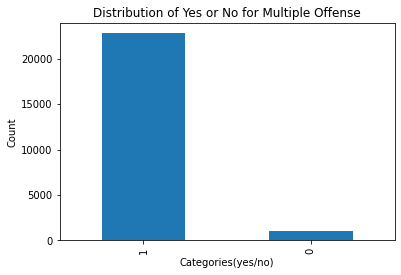

In [0]:
hack_plot=df['MULTIPLE_OFFENSE'].value_counts().plot.bar()
plt.title("Distribution of Yes or No for Multiple Offense")
plt.xlabel("Categories(yes/no)")
plt.ylabel("Count")

In [0]:
# It shows that in 95% cases hack happens and only in 4% cases it did not happen 

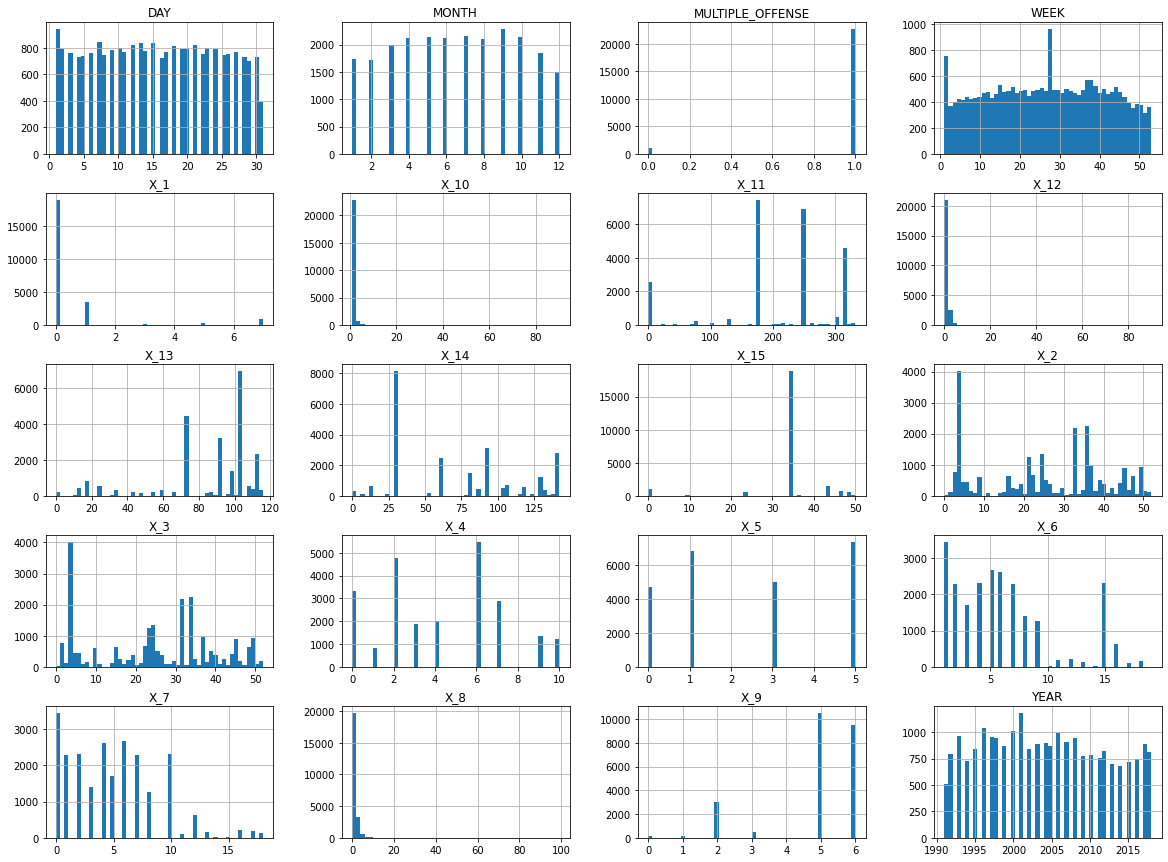

In [0]:
# Let's plot a histogram to get the feel of type of data we are dealing with
# We can plot histogram only for numerical attributres
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
# lets do data analysis of each variable w.r.t. target variable
# Since there are 95% cases of hacking and 4% of not hacked.
# So we will see the range of variables for which hacking is most.So that we can set our varaible range accordingly to stop hacking

In [0]:
month_hack=pd.crosstab( df['MONTH'],df['MULTIPLE_OFFENSE'])
month_hack

MULTIPLE_OFFENSE,0,1
MONTH,,
1,91,1648
2,69,1646
3,85,1905
4,100,2014
5,115,2027
6,97,2016
7,92,2065
8,92,2018
9,78,2212


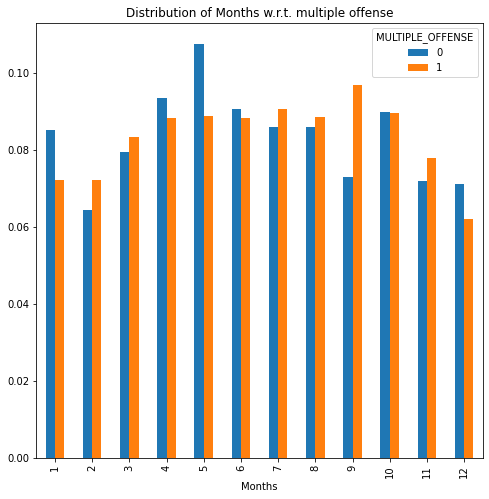

In [0]:
month_hack.div(month_hack.sum().astype(float)).plot(kind="bar", figsize=(8,8))
plt.title("Distribution of Months w.r.t. multiple offense")
plt.xlabel("Months")
plt.show()

In [0]:
# It cant be said for any month particularly that hacking is happened or not happened for particular month.Also there is no increasing or decreasing trend w.r.t. months so we cant conclude anything from this

In [0]:
year_hack=pd.crosstab( df['YEAR'],df['MULTIPLE_OFFENSE'])
year_hack

MULTIPLE_OFFENSE,0,1
YEAR,,
1991,15,497
1992,21,771
1993,30,932
1994,26,698
1995,50,788
1996,66,974
1997,57,895
1998,55,892
1999,34,831


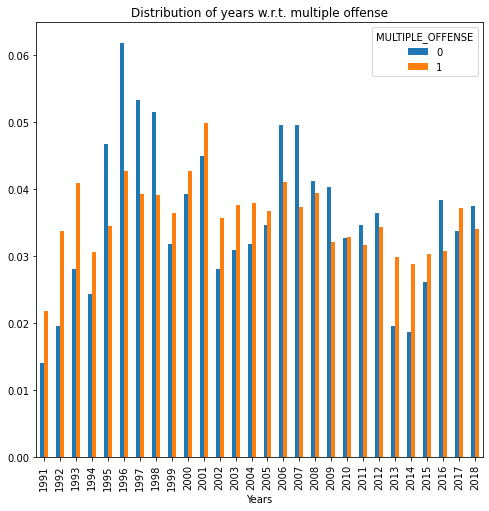

In [0]:
year_hack.div(year_hack.sum().astype(float)).plot(kind="bar", figsize=(8,8))
plt.title("Distribution of years w.r.t. multiple offense")
plt.xlabel("Years")
plt.show()

In [0]:
# It cant be said for any  year particularly that hacking is happened or not happened for particular year.Also there is no increasing or decreasing trend w.r.t. years so we cant conclude anything from this

In [0]:
week_hack=pd.crosstab( df['WEEK'],df['MULTIPLE_OFFENSE'])
week_hack

MULTIPLE_OFFENSE,0,1
WEEK,,
1,23,334
2,22,374
3,18,354
4,17,383
5,26,401
6,15,404
7,20,422
8,14,411
9,13,422


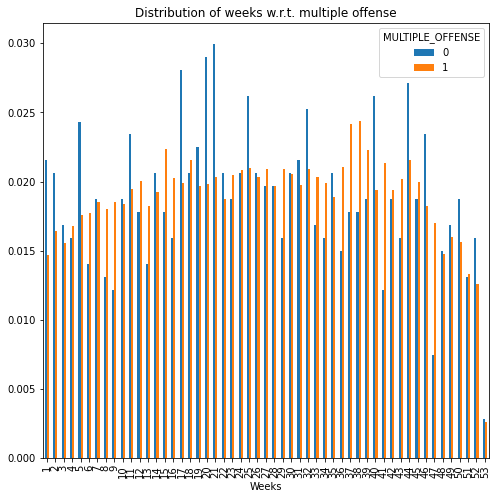

In [0]:
week_hack.div(week_hack.sum().astype(float)).plot(kind="bar", figsize=(8,8))
plt.title("Distribution of weeks w.r.t. multiple offense")
plt.xlabel("Weeks")
plt.show()

In [0]:
# It cant be said for any week particularly that hacking is happened or not happened for particular week.Also there is no increasing or decreasing trend w.r.t. weeks so we cant conclude anything from this

In [0]:
X1_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_1'])
X1_hack

X_1,0,1,2,3,4,5,6,7
MULTIPLE_OFFENSE,,,,,,,,
0,842,189,0,0,0,15,1,21
1,18194,3308,10,136,26,255,4,855


In [0]:
bins=[0,2,5,8]
groups=['Low(0-2)','Medium(2-5)', 'High(5-8)']

In [0]:
df['X1_Bin']=pd.cut(df['X_1'],bins,labels=groups)
X1_Bin=pd.crosstab(df['X1_Bin'], df['MULTIPLE_OFFENSE'])
X1_Bin

MULTIPLE_OFFENSE,0,1
X1_Bin,,
Low(0-2),189,3318
Medium(2-5),15,417
High(5-8),22,859


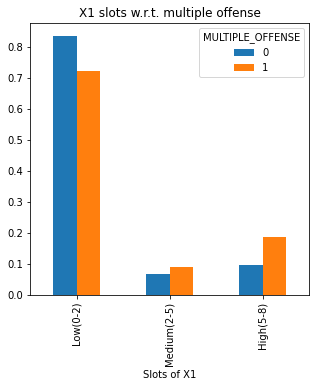

In [0]:
X1_Bin.div(X1_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X1 slots w.r.t. multiple offense")
plt.xlabel("Slots of X1")
plt.show()

In [0]:
# It can be inferred that for X1 variable, mostly hacking happened in range of (0-2) of X1.

In [0]:
X2_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_2'])
X2_hack

X_2,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,3,20,173,25,40,1,10,0,0,2,0,7,10,33,7,18,19,2,50,7,9,48,6,20,2,3,0,31,0,2,0,1,11,186,47,16,13,25,3,11,3,16,45,11,47,2,69,7,6,1
1,22,20,113,758,3856,412,394,165,94,593,2,105,6,77,126,598,231,192,351,52,1204,665,113,1296,493,336,21,75,99,235,43,67,2174,55,175,2046,915,148,500,360,90,227,66,412,863,170,594,53,858,153,97,18


In [0]:
bins=[0,20,40,55]
groups=['Low(0-20)','Medium(20-40)', 'High(40-55)']

In [0]:
df['X2_Bin']=pd.cut(df['X_2'],bins,labels=groups)
X2_Bin=pd.crosstab(df['X2_Bin'], df['MULTIPLE_OFFENSE'])
X2_Bin

MULTIPLE_OFFENSE,0,1
X2_Bin,,
Low(0-20),370,8145
Medium(20-40),477,11020
High(40-55),221,3601


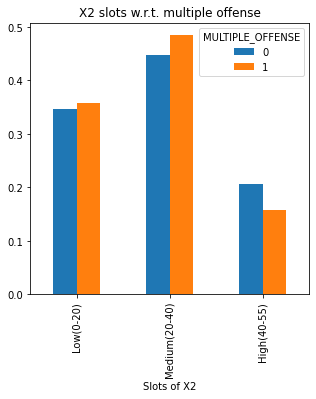

In [0]:
X2_Bin.div(X2_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X2 slots w.r.t. multiple offense")
plt.xlabel("Slots of X2")
plt.show()

In [0]:
# It can be inferred that for X2 variable, mostly hacking happened in range of (20-40) of X2.

In [0]:
X3_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_3'])
X3_hack

X_3,0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,20,3,173,25,40,10,1,0,0,2,0,10,33,7,7,18,19,2,9,7,50,48,6,2,20,3,0,11,2,0,1,186,31,0,47,16,13,25,3,11,3,16,45,11,2,47,69,6,7,1
1,20,22,758,113,3856,412,394,94,165,2,593,105,6,126,598,231,77,192,351,52,113,665,1204,1296,493,21,336,75,99,175,67,2174,55,2046,235,43,915,148,500,360,90,227,66,412,863,170,53,594,858,97,153,18


In [0]:
bins=[0,20,40,55]
groups=['Low(0-20)','Medium(20-40)', 'High(40-55)']

In [0]:
df['X3_Bin']=pd.cut(df['X_3'],bins,labels=groups)
X3_Bin=pd.crosstab(df['X3_Bin'], df['MULTIPLE_OFFENSE'])
X3_Bin

MULTIPLE_OFFENSE,0,1
X3_Bin,,
Low(0-20),370,8147
Medium(20-40),477,11020
High(40-55),221,3601


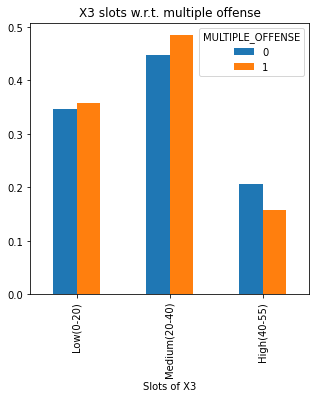

In [0]:
X3_Bin.div(X3_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X3 slots w.r.t. multiple offense")
plt.xlabel("Slots of X3")
plt.show()

In [0]:
# It can be inferred that for X3 variable, mostly hacking happened in range of (20-40) of X3.

In [0]:
X4_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_4'])
X4_hack

X_4,0,1,2,3,4,5,6,7,9,10
MULTIPLE_OFFENSE,,,,,,,,,,
0,142,37,211,82,106,0,255,115,54,66
1,3193,804,4580,1789,1921,2,5242,2775,1306,1176


In [0]:
bins=[0,3,6,10]
groups=['Low(0-3)','Medium(3-6)', 'High(6-10)']

In [0]:
df['X4_Bin']=pd.cut(df['X_4'],bins,labels=groups)
X4_Bin=pd.crosstab(df['X4_Bin'], df['MULTIPLE_OFFENSE'])
X4_Bin

MULTIPLE_OFFENSE,0,1
X4_Bin,,
Low(0-3),330,7173
Medium(3-6),361,7165
High(6-10),235,5257


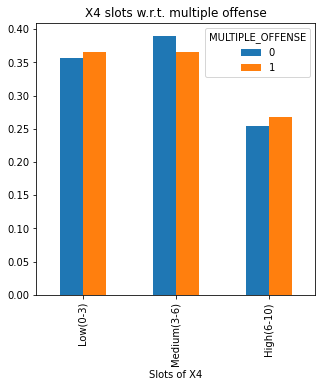

In [0]:
X4_Bin.div(X4_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X4 slots w.r.t. multiple offense")
plt.xlabel("Slots of X4")
plt.show()

In [0]:
# It can be inferred that for X4 variable, mostly hacking happened in range of (0-6) of X4.

In [0]:
X5_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_5'])
X5_hack

X_5,0,1,2,3,5
MULTIPLE_OFFENSE,,,,,
0,196,317,0,218,337
1,4499,6501,2,4755,7031


In [0]:
bins=[0,2,5]
groups=['Low(0-2)','Medium(2-5)']

In [0]:
df['X5_Bin']=pd.cut(df['X_5'],bins,labels=groups)
X5_Bin=pd.crosstab(df['X5_Bin'], df['MULTIPLE_OFFENSE'])
X5_Bin

MULTIPLE_OFFENSE,0,1
X5_Bin,,
Low(0-2),317,6503
Medium(2-5),555,11786


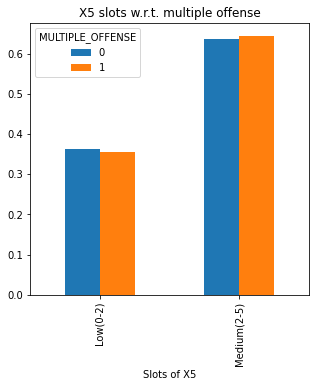

In [0]:
X5_Bin.div(X5_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X5 slots w.r.t. multiple offense")
plt.xlabel("Slots of X5")
plt.show()

In [0]:
# It can be inferred that for X5 variable, mostly hacking happened in range of (2-5) of X5.

In [0]:
X6_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_6'])
X6_hack

X_6,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,
0,170,86,87,109,114,111,83,65,39,3,11,16,6,1,114,36,7,10,0
1,3291,2212,1621,2210,2565,2518,2203,1340,1228,22,189,194,133,17,2204,584,103,152,2


In [0]:
bins=[0,7,14,20]
groups=['Low(0-7)','Medium(7-14)', 'High(14-20)']

In [0]:
df['X6_Bin']=pd.cut(df['X_6'],bins,labels=groups)
X6_Bin=pd.crosstab(df['X6_Bin'], df['MULTIPLE_OFFENSE'])
X6_Bin

MULTIPLE_OFFENSE,0,1
X6_Bin,,
Low(0-7),760,16620
Medium(7-14),141,3123
High(14-20),167,3045


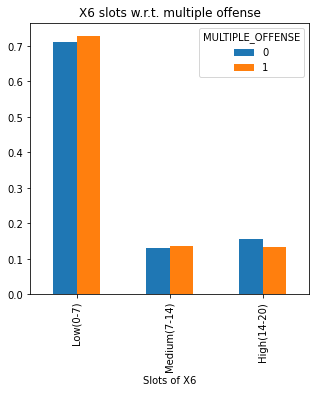

In [0]:
X6_Bin.div(X6_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X6 slots w.r.t. multiple offense")
plt.xlabel("Slots of X6")
plt.show()

In [0]:
# It can be inferred that for X6 variable, mostly hacking happened in range of (0-7) of X6.

In [0]:
X7_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_7'])
X7_hack

X_7,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,
0,170,83,109,65,111,87,114,86,39,0,114,7,36,10,1,3,16,11,6
1,3291,2203,2210,1340,2518,1621,2565,2212,1228,2,2204,103,584,152,17,22,194,189,133


In [0]:
bins=[0,7,14,20]
groups=['Low(0-7)','Medium(7-14)', 'High(14-20)']

In [0]:
df['X7_Bin']=pd.cut(df['X_7'],bins,labels=groups)
X7_Bin=pd.crosstab(df['X7_Bin'], df['MULTIPLE_OFFENSE'])
X7_Bin

MULTIPLE_OFFENSE,0,1
X7_Bin,,
Low(0-7),655,14669
Medium(7-14),207,4290
High(14-20),36,538


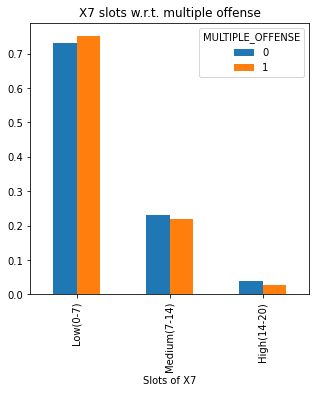

In [0]:
X7_Bin.div(X7_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X7 slots w.r.t. multiple offense")
plt.xlabel("Slots of X7")
plt.show()

In [0]:
# It can be inferred that for X7 variable, mostly hacking happened in range of (0-7) of X7.

In [0]:
X8_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_8'])
X8_hack

X_8,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,21,22,29,30,50,99
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,
0,396,409,125,67,34,19,5,1,4,0,2,2,1,0,0,1,0,1,0,0,1,0,0,0
1,8378,10601,2143,900,370,188,74,32,28,16,21,6,7,2,2,10,2,3,1,1,0,1,1,1


In [0]:
bins=[0,30,60,100]
groups=['Low(0-30)','Medium(30-60)', 'High(60-100)']

In [0]:
df['X8_Bin']=pd.cut(df['X_8'],bins,labels=groups)
X8_Bin=pd.crosstab(df['X8_Bin'], df['MULTIPLE_OFFENSE'])
X8_Bin

MULTIPLE_OFFENSE,0,1
X8_Bin,,
Low(0-30),672,14408
Medium(30-60),0,1
High(60-100),0,1


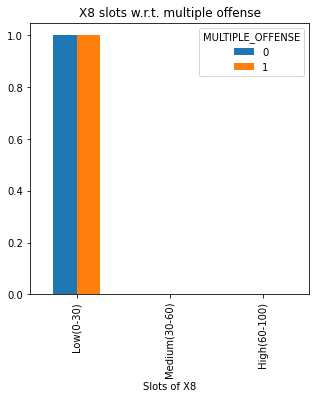

In [0]:
X8_Bin.div(X8_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X8 slots w.r.t. multiple offense")
plt.xlabel("Slots of X8")
plt.show()

In [0]:
# It can be inferred that for X8 variable, approx all hacking happened in range of (0-30) of X8.

In [0]:
X9_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_9'])
X9_hack

X_9,0,1,2,3,4,5,6
MULTIPLE_OFFENSE,,,,,,,
0,3,5,132,36,0,465,427
1,115,170,2908,416,4,10094,9081


In [0]:
bins=[0,3,7]
groups=['Low(0-3)','Medium(3-7)']

In [0]:
df['X9_Bin']=pd.cut(df['X_9'],bins,labels=groups)
X9_Bin=pd.crosstab(df['X9_Bin'], df['MULTIPLE_OFFENSE'])
X9_Bin

MULTIPLE_OFFENSE,0,1
X9_Bin,,
Low(0-3),173,3494
Medium(3-7),892,19179


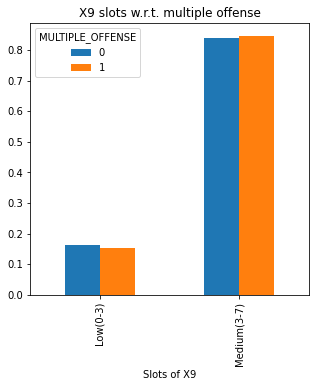

In [0]:
X9_Bin.div(X9_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X9 slots w.r.t. multiple offense")
plt.xlabel("Slots of X9")
plt.show()

In [0]:
# It can be inferred that for X9 variable, mostly hacking happened in range of (3-7) of X9.

In [0]:
X10_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_10'])
X10_hack

X_10,1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20,22,30,40,50,58,90
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,
0,105,702,106,84,19,28,3,9,3,4,0,1,1,1,0,1,0,0,1,0,0,0,0,0
1,20093,1993,443,141,52,26,4,6,4,10,4,2,1,0,1,0,1,2,0,1,1,1,1,1


In [0]:
bins=[0,30,60,100]
groups=['Low(0-30)','Medium(30-60)', 'High(60-100)']

In [0]:
df['X10_Bin']=pd.cut(df['X_10'],bins,labels=groups)
X10_Bin=pd.crosstab(df['X10_Bin'], df['MULTIPLE_OFFENSE'])
X10_Bin

MULTIPLE_OFFENSE,0,1
X10_Bin,,
Low(0-30),1068,22784
Medium(30-60),0,3
High(60-100),0,1


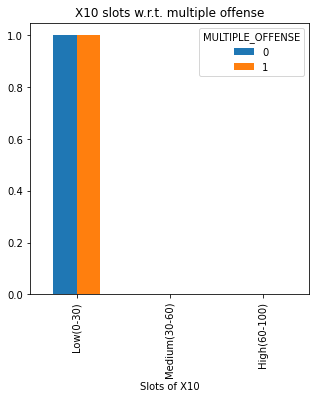

In [0]:
X10_Bin.div(X10_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X10 slots w.r.t. multiple offense")
plt.xlabel("Slots of X10")
plt.show()

In [0]:
# It can be inferred that for X10 variable, approx all hacking happened in range of (0-30) of X10.

In [0]:
X11_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_11'])
X11_hack

X_11,0,1,6,11,12,16,20,21,25,31,32,33,34,39,43,47,50,53,55,56,58,60,67,68,69,71,73,74,75,76,79,82,84,97,98,102,103,104,106,111,...,254,255,256,260,261,263,264,266,268,270,273,274,277,285,287,290,291,292,294,295,297,299,300,303,306,310,313,314,316,319,320,321,322,323,325,327,328,329,330,332
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,3,1,5,1,2,1,45,3,2,1,1,1,1,59,1,2,2,1,1,3,3,16,1,1,36,7,3,2,1,2,12,1,1,6,4,1,2,1,15,...,3,1,1,4,1,103,1,1,7,0,1,4,0,0,1,5,2,0,1,0,0,0,1,11,15,0,0,1,0,1,2,0,0,0,0,0,2,0,0,0
1,2553,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,0,0,0,0,0,0,0,118,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6,0,0,45,26,0,71,0,3,0,3,2,30,0,427,0,6,68,0,4500,0,0,7,1,10,57,1,77,21,29,3


In [0]:
bins=[0,100,200,335]
groups=['Low(0-100)','Medium(100-200)', 'High(200-335)']

In [0]:
df['X11_Bin']=pd.cut(df['X_11'],bins,labels=groups)
X11_Bin=pd.crosstab(df['X11_Bin'], df['MULTIPLE_OFFENSE'])
X11_Bin

MULTIPLE_OFFENSE,0,1
X11_Bin,,
Low(0-100),228,204
Medium(100-200),634,7502
High(200-335),206,12529


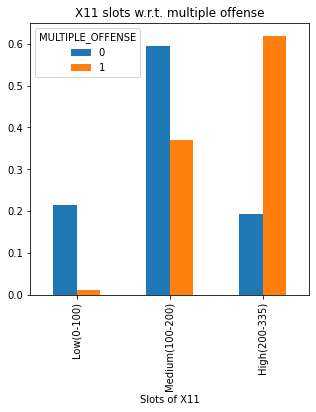

In [0]:
X11_Bin.div(X11_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X11 slots w.r.t. multiple offense")
plt.xlabel("Slots of X11")
plt.show()

In [0]:
# It can be inferred that for X11 variable, mostly hacking happened in range of (200-335) of X11.

In [0]:
X12_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_12'])
X12_hack

X_12,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,15.0,16.0,17.0,20.0,30.0,40.0,50.0,58.0,90.0
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,
0,114,547,272,57,44,10,11,0,4,2,4,0,0,1,1,1,0,0,0,0,0,0,0
1,5057,15309,1767,419,132,49,25,4,5,4,3,4,1,0,1,0,1,2,1,1,1,1,1


In [0]:
bins=[0,30,60,100]
groups=['Low(0-30)','Medium(30-60)', 'High(60-100)']

In [0]:
df['X12_Bin']=pd.cut(df['X_12'],bins,labels=groups)
X12_Bin=pd.crosstab(df['X12_Bin'], df['MULTIPLE_OFFENSE'])
X12_Bin

MULTIPLE_OFFENSE,0,1
X12_Bin,,
Low(0-30),954,17727
Medium(30-60),0,3
High(60-100),0,1


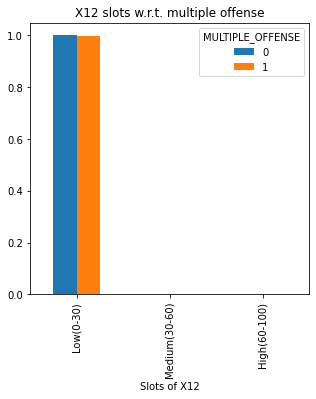

In [0]:
X12_Bin.div(X12_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X12 slots w.r.t. multiple offense")
plt.xlabel("Slots of X12")
plt.show()

In [0]:
# It can be inferred that for X12 variable, approx all hacking happened in range of (0-30) of X12.

In [0]:
X13_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_13'])
X13_hack

X_13,0,1,2,7,8,9,10,12,13,17,18,24,25,27,30,31,32,34,40,41,42,43,44,48,54,58,59,60,67,69,72,73,74,75,76,77,80,83,84,86,87,88,89,92,94,95,97,98,99,102,103,108,109,110,111,112,113,114,115,116
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,4,0,0,0,3,19,1,1,50,22,1,2,1,5,1,18,0,0,8,1,1,2,11,0,9,1,7,1,186,1,1,1,2,3,1,1,3,0,4,3,1,135,4,1,2,73,2,2,378,0,27,3,3,45,11,0,0,6
1,1,5,206,1,2,9,43,408,0,0,801,501,0,0,12,59,0,324,7,3,192,0,0,170,223,3,339,0,204,0,4290,0,0,0,0,0,0,0,142,8,146,41,50,3120,0,0,74,1293,0,18,6617,6,510,144,212,2071,214,16,21,282


In [0]:
bins=[0,40,80,120]
groups=['Low(0-40)','Medium(40-80)', 'High(80-120)']

In [0]:
df['X13_Bin']=pd.cut(df['X_13'],bins,labels=groups)
X13_Bin=pd.crosstab(df['X13_Bin'], df['MULTIPLE_OFFENSE'])
X13_Bin

MULTIPLE_OFFENSE,0,1
X13_Bin,,
Low(0-40),128,2378
Medium(40-80),236,5424
High(80-120),704,14985


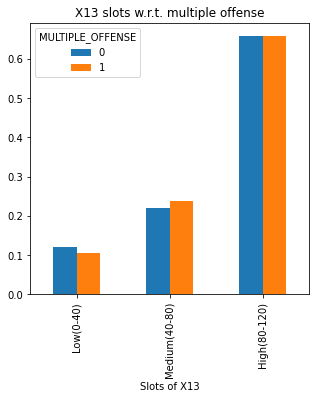

In [0]:
X13_Bin.div(X13_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X13 slots w.r.t. multiple offense")
plt.xlabel("Slots of X13")
plt.show()

In [0]:
# It can be inferred that for X13 variable, mostly hacking happened in range of (80-120) of X13.

In [0]:
X14_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_14'])
X14_hack

X_14,0,2,6,12,14,16,24,25,29,30,33,34,37,40,43,46,51,52,53,56,57,58,59,61,62,65,66,68,70,74,76,77,79,80,81,86,87,90,92,93,97,99,100,103,104,107,109,111,114,115,118,119,124,128,129,130,133,136,138,139,140,142
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,9,1,7,0,26,2,2,2,323,2,1,0,0,0,1,0,3,0,16,0,2,0,1,0,106,2,1,1,1,0,0,2,0,69,1,2,17,1,0,153,1,1,1,21,1,25,1,2,1,4,0,18,5,0,2,57,22,3,6,0,5,138
1,279,0,112,1,631,0,19,75,7842,1,0,1,1,1,0,1,0,3,161,10,16,1,0,1,2368,0,1,0,0,2,19,55,5,1419,0,1,438,0,1,2957,1,0,1,485,0,709,0,11,0,126,2,561,120,4,15,1148,334,63,131,10,69,2576


In [0]:
bins=[0,50,100,150]
groups=['Low(0-50)','Medium(50-100)', 'High(100-150)']

In [0]:
df['X14_Bin']=pd.cut(df['X_14'],bins,labels=groups)
X14_Bin=pd.crosstab(df['X14_Bin'], df['MULTIPLE_OFFENSE'])
X14_Bin

MULTIPLE_OFFENSE,0,1
X14_Bin,,
Low(0-50),367,8685
Medium(50-100),381,7460
High(100-150),311,6364


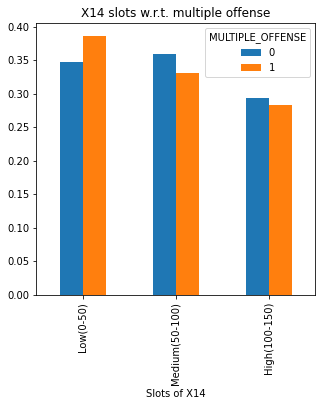

In [0]:
X14_Bin.div(X14_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X14 slots w.r.t. multiple offense")
plt.xlabel("Slots of X14")
plt.show()

In [0]:
# It can be inferred that for X14 variable, in all ranges (0-150) hacking is positive but comparativelywe can say that high rate of hacking is in range of (0-50) of X14.

In [0]:
X15_hack=pd.crosstab(df['MULTIPLE_OFFENSE'], df['X_15'])
X15_hack

X_15,0,4,5,8,9,12,14,15,16,17,18,21,22,23,24,31,32,34,35,36,38,39,40,41,43,46,48,50
MULTIPLE_OFFENSE,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,20,4,1,1,92,1,1,2,1,4,0,1,1,2,20,1,1,620,1,182,20,54,6,0,2,23,7,0
1,997,0,0,0,0,0,0,0,0,0,13,0,0,640,0,0,0,18327,0,0,0,0,0,6,1501,645,514,145


In [0]:
bins=[0,15,30,51]
groups=['Low(0-15)','Medium(15-30)', 'High(30-51)']

In [0]:
df['X15_Bin']=pd.cut(df['X_15'],bins,labels=groups)
X15_Bin=pd.crosstab(df['X15_Bin'], df['MULTIPLE_OFFENSE'])
X15_Bin

MULTIPLE_OFFENSE,0,1
X15_Bin,,
Low(0-15),102,0
Medium(15-30),29,653
High(30-51),917,21138


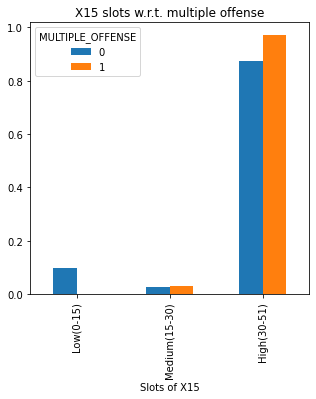

In [0]:
X15_Bin.div(X15_Bin.sum().astype(float)).plot(kind="bar", figsize=(5,5))
plt.title("X15 slots w.r.t. multiple offense")
plt.xlabel("Slots of X15")
plt.show()

In [0]:
# It can be inferred that for X15 variable, mostly hacking happened in range of (30-51) of X15.

In [0]:
# removing unwanted column which we have created during EDA above
df=df.drop(['X1_Bin','X2_Bin','X3_Bin','X4_Bin',
            'X5_Bin', 'X6_Bin','X7_Bin','X8_Bin','X9_Bin','X10_Bin',
            'X11_Bin','X12_Bin','X13_Bin','X14_Bin','X15_Bin'],1)

In [0]:
df.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15',
       'MULTIPLE_OFFENSE', 'DAY', 'MONTH', 'YEAR', 'WEEK'],
      dtype='object')

In [0]:
df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,DAY,MONTH,YEAR,WEEK
0,CR_102659,2004-07-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,4,7,2004,27
1,CR_189752,2017-07-18,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,18,7,2017,29
2,CR_184637,2017-03-15,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,15,3,2017,11
3,CR_139071,2009-02-13,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,13,2,2009,7
4,CR_109335,2005-04-13,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,13,4,2005,15


In [0]:
# The date attributes like year, month & week are not impacting target variable.
# If we include these date attributes it is negatively impacting accuracy level of model and I hve tested that
# So for further processing I am removing date attributes
# Two features X_4 & X_14 are not having great trend with target variable.So i am removing these two for more generalized model

In [0]:
# LETS DO MACHINE LEARNING

In [0]:
# 4. Sampling data for applying machine learning.

In [0]:
X1=df.drop(['INCIDENT_ID','DATE','MULTIPLE_OFFENSE','DAY','WEEK','MONTH','YEAR','X_4','X_14'],1)
y=df['MULTIPLE_OFFENSE']

In [0]:
X1.columns

Index(['X_1', 'X_2', 'X_3', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10', 'X_11',
       'X_12', 'X_13', 'X_15'],
      dtype='object')

In [0]:
# 5. Standardization& Normalization of data.Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).
# like in this data we have seen there are different value ranges for all different attributes. So this would help machine learning models to perform good in such cases

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
scaler.fit(X1)
X=scaler.transform(X1)

In [0]:
X.shape

(23856, 13)

In [0]:
# splitting and preparing data for implementation of machine learning

In [0]:
# With sklearn train_test_split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print((X_train.shape), "X_train +", (X_test.shape), "X_test")
print((y_train.shape), "y_train +", (y_test.shape), "y_test")

(19084, 13) X_train + (4772, 13) X_test
(19084,) y_train + (4772,) y_test


In [0]:
# 6. Machine learning implementation with multiple classification models
# 1. Logistic Regression Classifier
# 2. Random Forest Classifier
# 3. SGD Classifier
# 4. Voting Classifier
# 5. Bagging Classifier
# 6. Extra Tree Classifier
# 7. Adaboost Classifier
# 8. XGBoost Classifier
# 9. XGBoost Classifier with grid search(Hyperparametr Tuning, which would tell us best parameters to be taken inside classifier for best results)

In [0]:
from sklearn.linear_model import LogisticRegression  
clf1 = LogisticRegression(random_state=42)

In [0]:
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred1=clf1.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier 
clf2 = RandomForestClassifier(random_state=42)

In [0]:
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred2=clf2.predict(X_test)

In [0]:
from sklearn.linear_model import SGDClassifier   

clf3 = SGDClassifier(random_state=42, max_iter=10) # if you want reproducible results set the random_state value.
clf3.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=10,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [0]:
y_pred3=clf3.predict(X_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier                 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf4 = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf4.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [0]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf4):
    clf.fit(X_train, y_train)
    y_pred4 = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred4))

LogisticRegression 0.953059513830679
RandomForestClassifier 0.9941324392288349
SVC 0.9731768650461022
VotingClassifier 0.9742246437552389


In [0]:
from sklearn.ensemble import BaggingClassifier     
from sklearn.ensemble import RandomForestClassifier

bag_clf5 = BaggingClassifier( 
    RandomForestClassifier(), 
    n_estimators=500, 
    max_samples=300, 
    bootstrap=False, 
    n_jobs=-1
)

bag_clf5.fit(X_train, y_train)
y_pred5 = bag_clf5.predict(X_test)

In [0]:
 from sklearn.ensemble import ExtraTreesClassifier   

clf6 = ExtraTreesClassifier(n_estimators=195, max_leaf_nodes=16, n_jobs=-1, random_state=42)
clf6.fit(X_train, y_train)
y_pred6 = clf6.predict(X_test)

In [0]:
from sklearn.ensemble import AdaBoostClassifier   

clf7 = AdaBoostClassifier(
    RandomForestClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
clf7.fit(X_train, y_train)
y_pred7 = clf7.predict(X_test)

In [0]:
from xgboost import XGBClassifier  
clf8 = XGBClassifier()
clf8.fit(X_train, y_train)
y_pred8 = clf8.predict(X_test)

In [183]:
from xgboost import XGBClassifier  
from sklearn.model_selection import GridSearchCV  

param_grid = [
    {'learning_rate': [0.1, 0.3], 
     'min_child_weight': [0.5, 2], 'gamma': [0, 0.2], 'max_delta_step': [0], 'subsample': [1], 'colsample_bytree': [1], 'colsample_bylevel':[1], 'scale_pos_weight': [1]},]

xgbc_grid = XGBClassifier()
grid_search9 = GridSearchCV(xgbc_grid, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search9.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...e,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid=[{'colsample_bylevel': [1], 'colsample_bytree': [1],
                          'gamma': [0, 0.2], 'learning_rate': [0.1, 0.3],
                          'max_delta_step': [0], 'min_ch

In [0]:
y_pred9 = grid_search9.predict(X_test)

In [0]:
# 7. Performance measures and check which model is giving highest score.We will use following performance measures:
# 1. Confusion matrix
# 2. Precision, Recall, Accuracy score
# 3. Roc curves

In [0]:
from sklearn import metrics
from sklearn.metrics import f1_score

In [188]:
cnf_matrix1=metrics.confusion_matrix(y_test, y_pred1)
cnf_matrix1

array([[  32,  203],
       [  21, 4516]])

In [189]:
cnf_matrix2=metrics.confusion_matrix(y_test, y_pred2)
cnf_matrix2

array([[ 211,   24],
       [   4, 4533]])

In [190]:
cnf_matrix3=metrics.confusion_matrix(y_test, y_pred3)
cnf_matrix3

array([[  13,  222],
       [  18, 4519]])

In [191]:
cnf_matrix4=metrics.confusion_matrix(y_test, y_pred4)
cnf_matrix4

array([[ 116,  119],
       [   4, 4533]])

In [192]:
cnf_matrix5=metrics.confusion_matrix(y_test, y_pred5)
cnf_matrix5

array([[   7,  228],
       [   0, 4537]])

In [193]:
cnf_matrix6=metrics.confusion_matrix(y_test, y_pred6)
cnf_matrix6

array([[   0,  235],
       [   0, 4537]])

In [194]:
cnf_matrix7=metrics.confusion_matrix(y_test, y_pred7)
cnf_matrix7

array([[ 203,   32],
       [   5, 4532]])

In [195]:
cnf_matrix8=metrics.confusion_matrix(y_test, y_pred8)
cnf_matrix8

array([[ 232,    3],
       [   2, 4535]])

In [196]:
cnf_matrix9=metrics.confusion_matrix(y_test, y_pred9)
cnf_matrix9

array([[ 235,    0],
       [   1, 4536]])

Text(0.5, 15.0, 'Predicted label')

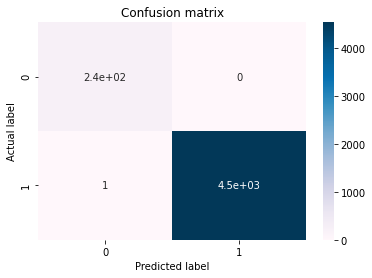

In [197]:
# Visulaization of confusion matrix for XGB Classfier with grid serach
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks=np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

### create heatmap

sns.heatmap(pd.DataFrame(cnf_matrix9), annot=True, cmap='PuBu')
ax.xaxis.set_label_position("bottom")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
# It's color intensity shows its accuracy level plus its values are also shown on diagnols 
# On pink diagnol, the values (0 & 1) are wrongly predicted values, and on other diagnol values( 4536,235) are correctly predicted.
# This result shows that model is pretty good

In [199]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
print("Precision:",metrics.precision_score(y_test, y_pred1))
print("Recall:",metrics.recall_score(y_test, y_pred1))
print("f1 score:",metrics.f1_score(y_test, y_pred1))

Accuracy: 0.953059513830679
Precision: 0.9569824115278661
Recall: 0.9953713907868635
f1 score: 0.9757994814174589


In [200]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("Precision:",metrics.precision_score(y_test, y_pred2))
print("Recall:",metrics.recall_score(y_test, y_pred2))
print("f1 score:",metrics.f1_score(y_test, y_pred2))

Accuracy: 0.9941324392288349
Precision: 0.9947333772218565
Recall: 0.9991183601498788
f1 score: 0.996921046844073


In [201]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred3))
print("Precision:",metrics.precision_score(y_test, y_pred3))
print("Recall:",metrics.recall_score(y_test, y_pred3))
print("f1 score:",metrics.f1_score(y_test, y_pred3))

Accuracy: 0.9497066219614417
Precision: 0.9531744357730436
Recall: 0.9960326206744545
f1 score: 0.9741323561112308


In [202]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred4))
print("Precision:",metrics.precision_score(y_test, y_pred4))
print("Recall:",metrics.recall_score(y_test, y_pred4))
print("f1 score:",metrics.f1_score(y_test, y_pred4))

Accuracy: 0.9742246437552389
Precision: 0.9744196044711951
Recall: 0.9991183601498788
f1 score: 0.9866144302970943


In [203]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred5))
print("Precision:",metrics.precision_score(y_test, y_pred5))
print("Recall:",metrics.recall_score(y_test, y_pred5))
print("f1 score:",metrics.f1_score(y_test, y_pred5))

Accuracy: 0.9522212908633697
Precision: 0.9521511017838405
Recall: 1.0
f1 score: 0.9754891421199742


In [204]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred6))
print("Precision:",metrics.precision_score(y_test, y_pred6))
print("Recall:",metrics.recall_score(y_test, y_pred6))
print("f1 score:",metrics.f1_score(y_test, y_pred6))

Accuracy: 0.9507544006705784
Precision: 0.9507544006705784
Recall: 1.0
f1 score: 0.9747556128477817


In [205]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred7))
print("Precision:",metrics.precision_score(y_test, y_pred7))
print("Recall:",metrics.recall_score(y_test, y_pred7))
print("f1 score:",metrics.f1_score(y_test, y_pred7))

Accuracy: 0.992246437552389
Precision: 0.992988606485539
Recall: 0.9988979501873485
f1 score: 0.9959345126909132


In [206]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred8))
print("Precision:",metrics.precision_score(y_test, y_pred8))
print("Recall:",metrics.recall_score(y_test, y_pred8))
print("f1 score:",metrics.f1_score(y_test, y_pred8))

Accuracy: 0.9989522212908634
Precision: 0.999338915821948
Recall: 0.9995591800749394
f1 score: 0.9994490358126722


In [207]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred9))
print("Precision:",metrics.precision_score(y_test, y_pred9))
print("Recall:",metrics.recall_score(y_test, y_pred9))
print("f1 score:",metrics.f1_score(y_test, y_pred9))

Accuracy: 0.9997904442581727
Precision: 1.0
Recall: 0.9997795900374697
f1 score: 0.9998897828722584


In [0]:
# The above measures are for all models
# Since for the problem statement in hackathon performance evaluation will be based on recall_score so if we compare recall scores in all models above, The three models whose recall score are highest are as below:
# 1. Bagging classfier
# 2. Extra Tree classifier
# 3. XGB classifier (with hyperparameter tunuing) 
# Lets see further, how it works on test dataset only then we can decide which is better

In [0]:
# Let plot ROC curves for these three classfiers to compare

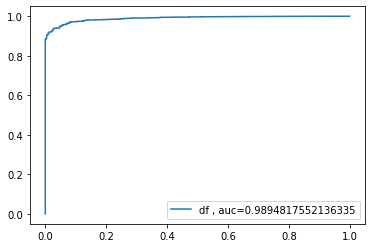

In [210]:
pred_test_proba = bag_clf5.predict_proba(X_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  pred_test_proba)
auc = metrics.roc_auc_score(y_test, pred_test_proba)
plt.plot(fpr, tpr, label="df , auc="+str(auc))
plt.legend(loc=4)
plt.show()

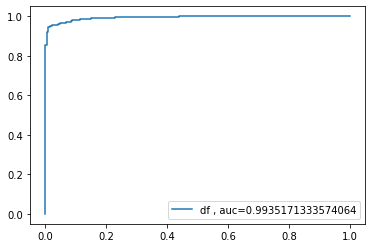

In [211]:
pred_test_proba = clf6.predict_proba(X_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  pred_test_proba)
auc = metrics.roc_auc_score(y_test, pred_test_proba)
plt.plot(fpr, tpr, label="df , auc="+str(auc))
plt.legend(loc=4)
plt.show()

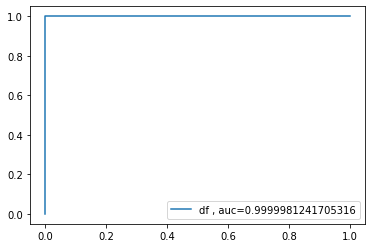

In [212]:
pred_test_proba = grid_search9.predict_proba(X_test)[::,1]
fpr, tpr, _  = metrics.roc_curve(y_test,  pred_test_proba)
auc = metrics.roc_auc_score(y_test, pred_test_proba)
plt.plot(fpr, tpr, label="df , auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [0]:
# As we can see out of three classifier which we have chosen based on recall scores, XBG Classifer perform best on ROC curve which is great performance measure in classification cases.In XGB case, it is giving maximum area unde cirve(auc) score.
# So we are considering XGBOOST CLASSFIER ALONG WITH GRID SEARCH(HYPERPARAMETER TUNING) to make predictions on test data

In [0]:
# 8. Making predictions on given test data and converted into required submission file (csv format)

In [216]:
df2.columns  # test data

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [217]:
df2.isnull().sum()  # checking missing values in test data because machine learning does not work on ata having missing or nan values present in it.

INCIDENT_ID    0
DATE           0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
dtype: int64

In [0]:
df2['X_12']=df2['X_12'].fillna(df2['X_12'].median())

In [219]:
df2.columns

Index(['INCIDENT_ID', 'DATE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8', 'X_9', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15'],
      dtype='object')

In [0]:
X2=df2.drop(['INCIDENT_ID','DATE','X_4','X_14'],1)

In [0]:
# Standardization of test data 
scaler.fit(X2)  
Z=scaler.transform(X2)

In [0]:
# making predictions on test data using finalized model i.e. XGBOOST CLASSIFIER WITH HYPERPARAMETER TUNED
predictions=model.predict(Z)

In [0]:
# Making submission file as per requirement

In [0]:
sub=df2['INCIDENT_ID'].to_frame()

In [0]:
sub['MULTIPLE_OFFENSE']=predictions

In [226]:
sub.columns

Index(['INCIDENT_ID', 'MULTIPLE_OFFENSE'], dtype='object')

In [227]:
sub.shape

(15903, 2)

In [228]:
sub.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,1
2,CR_196089,1
3,CR_112195,1
4,CR_149832,1


In [229]:
sub.isnull().sum()   # checking for null values in final submission file

INCIDENT_ID         0
MULTIPLE_OFFENSE    0
dtype: int64

In [230]:
sub.shape   # final submission file shape should match shape of test data

(15903, 2)

In [231]:
# converting submission file into csv format as required
import base64
from IPython.display import HTML

def create_download_link( sub, title = "Download CSV file", filename = "sub.csv"):  
    csv = sub.to_csv(index=False)
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(sub)